In [1]:
# program to simulate the schelling model in some special cases of the paper of physical analogues
# only the last cell of code has to be changed for the code to work
# instructions on how to choose parameters in the function description of the cell before the last

In [2]:
# importation of libraries
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [3]:
# functions to choose the initial configuration
def randomconfig(L,empty,typefrac,amplitude):
    # random initial configuration
    # L, amplitude not needed
    grid=[[0 for i in range(L)] for j in range(L)]
    for i in range(L):
        for j in range(L):
            rnd1=np.random.uniform(0.0,1.0)
            if (rnd1<empty):
                grid[i][j]=0
            else:
                rnd2=np.random.uniform(0.0,1.0)
                if (rnd2<typefrac):
                    grid[i][j]=1
                else:
                    grid[i][j]=-1
    return grid
def peakconfig(L,empty,typefrac,amplitude):
    # peaked initial configuration
    grid=[[0 for i in range(L)] for j in range(L)]
    for i in range(L):
        for j in range(L):
            rnd1=np.random.uniform(0.0,1.0)
            if (rnd1<empty):
                grid[j][i]=0
            else:
                if ((i<L/2 and j>typefrac*L+amplitude*(i-L/4)) or
                   (i>=L/2 and j>=typefrac*L-amplitude*(i-3*L/4))):
                    grid[j][i]=1
                else:
                    grid[j][i]=-1
    return grid
def sinconfig(L,empty,typefrac,amplitude):
    # sinusoidal initial configuration
    grid=[[0 for i in range(L)] for j in range(L)]
    for i in range(L):
        for j in range(L):
            rnd1=np.random.uniform(0.0,1.0)
            if (rnd1<empty):
                grid[j][i]=0
            else:
                if (j>typefrac*L+0.5*amplitude*L*np.sin(2*np.pi*i/L)):
                    grid[j][i]=1
                else:
                    grid[j][i]=-1
    return grid

In [4]:
# functions to choose the utility depending on the neighbours type
def stepfunction_pbc(grid,L,i,j,x):
    # step function for utility with periodic boundary conditions
    pbc=[i2 for i2 in range(L)]
    pbc.insert(-1,L-1)
    pbc.insert(L,0)
    differentneighbours=0
    for i2 in [-1,0,1]:
        for j2 in [-1,0,1]:
            if(((i2==0 and j2==0)==False) and (grid[i][j]*grid[pbc[i2]][pbc[j2]]==-1)):
                differentneighbours+=1
    if (differentneighbours<=x):
        utility=1
    else:
        utility=0
    return utility
def stepfunction_nopbc(grid,L,i,j,x):
    # step function for utility without periodic boundary conditions
    differentneighbours=0
    if (i==0):
        isides=[0,1]
    if (i==L-1):
        isides=[-1,0]
    else:
        isides=[-1,0,1]
    if (j==0):
        jsides=[0,1]
    if (j==L-1):
        jsides=[-1,0]
    else:
        jsides=[-1,0,1]
    for i2 in isides:
        for j2 in jsides:
            if(((i2==0 and j2==0)==False) and (grid[i][j]*grid[i2][j2]==-1)):
                differentneighbours+=1
    if (differentneighbours<=x):
        utility=1
    else:
        utility=0
    return utility

In [5]:
# funtions to choose the method of moving unsatisfied agents
def toempty(i,j,d,grid,L,utility,x):
    # move a given agent to an empty cell if the distance is less than d
    # L, utility, x not used
    exit,counter=0,0
    while (counter<1000 and exit==0):
        rndi2=rnd.randint(0,L-1)
        rndj2=rnd.randint(0,L-1)
        if (grid[rndi2][rndj2]==0 and (i-rndi2)**2+(j-rndj2)**2<d**2):
            grid[rndi2][rndj2]=grid[i][j]
            grid[i][j]=0
            exit=1
        counter+=1
    return grid
def swap(i,j,d,grid,L,utility,x):
    # swap the positions of two unsatisfied agents if the distance between them is less than d
    exit,counter=0,0
    while (counter<1000 and exit==0):
        rndi2=rnd.randint(0,L-1)
        rndj2=rnd.randint(0,L-1)
        if (utility(grid,L,rndi2,rndj2,x)==0 and grid[rndi2][rndj2]*grid[i][j]==-1 and (i-rndi2)**2+(j-rndj2)**2<d**2):
            a=grid[i][j]
            grid[i][j]=grid[rndi2][rndj2]
            grid[rndi2][rndj2]=a
            exit=1
        counter+=1
    return

In [6]:
def schelling(L,steps,initialconfig,empty,typefrac,amplitude,utility,x,move,d):
    # L: size of the sides of the square grid (any integer)
    # steps: array with the steps to plot, the maximum is the total number of steps (array of integers)
    # initialconfig: function for choosing the initial configuration (randomconfig,peakconfig,sinconfig)
        # empty: fraction of empty cells (0 to 1)
        # typefrac: fraction of cells with one of the types (0 to 1)
        # amplitude: amplitude of the function, if needed (0 to 1)
    # utility: function that dictates whether the agents are satisfied or not (stepfunction_pbc,stepfunction_nopbc)
        # x: tolerance of satisfaction (0 to 8)
    # move: function that dictates how to decide where to move (toempty,swap)
        # d: maximum distance that allows movement (any real)
    rows=int(len(steps)/2)
    fig, ax = plt.subplots(2,rows,figsize=[40,16])
    grid=initialconfig(L,empty,typefrac,amplitude)
    nplot=0
    for k in range(max(steps)+1):
        exit,counter=0,0
        while (counter<1000 and exit==0):
            rndi=rnd.randint(0,L-1)
            rndj=rnd.randint(0,L-1)
            if (grid[rndi][rndj]!=0 and utility(grid,L,rndi,rndj,x)==0):
                move(rndi,rndj,d,grid,L,utility,x)
                exit=1
            counter+=1
        if (k in steps):
            print(k)
            ax[nplot//rows,nplot%rows].imshow(grid,cmap='bwr',interpolation='nearest')
            ax[nplot//rows,nplot%rows].axis('off')
            ax[nplot//rows,nplot%rows].set_title(k,fontsize=32)
            nplot+=1
    plt.show()
    return

0
100
200
300
400
500
600
700
800
900


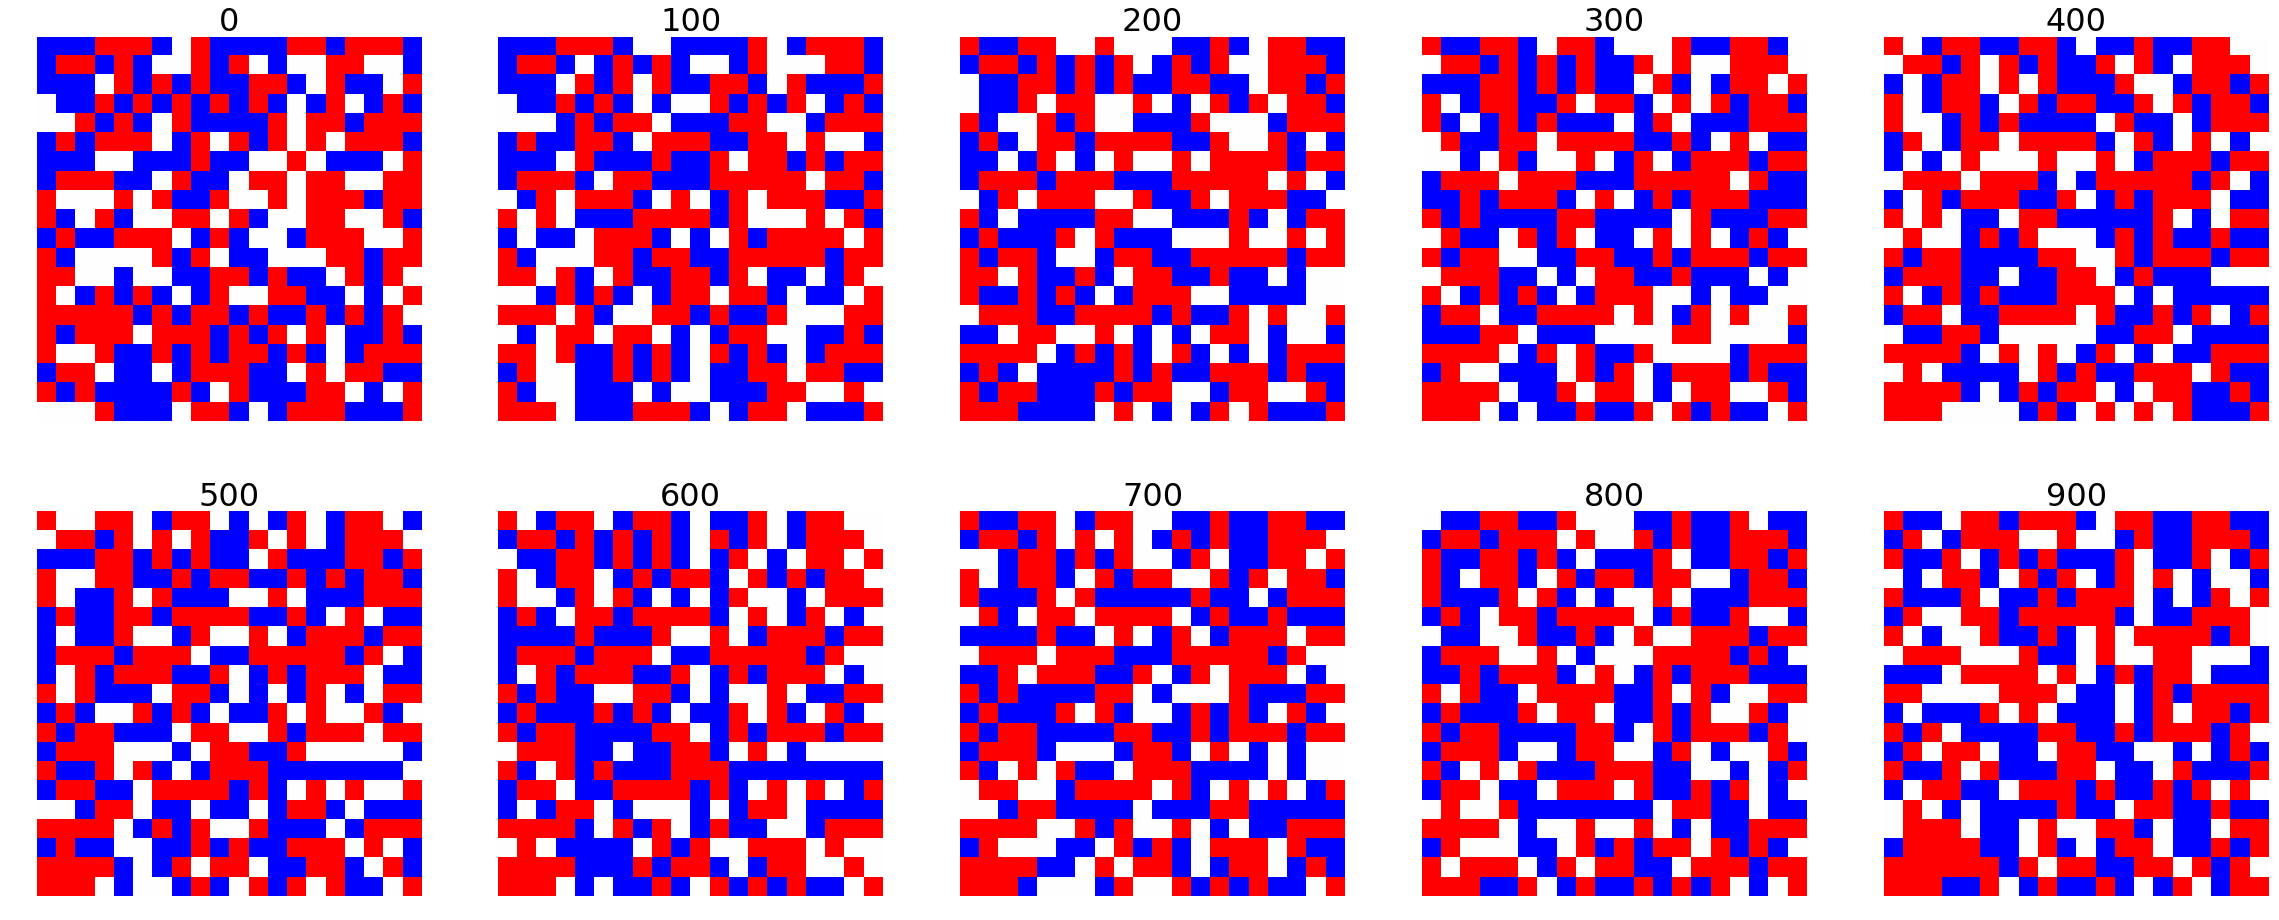

In [11]:
schelling(L=20,steps=[100*i for i in range(10)],
          initialconfig=randomconfig,empty=0.2,typefrac=0.5,amplitude=0.5,
          utility=stepfunction_pbc,x=3,
          move=toempty,d=50)